# Козубенко. Практические задания к уроку 5. Тема “Элементы теории вероятностей”


# 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [282]:
import numpy as np

def roulette():
    n = np.random.randint(0, 37)
    c = ""
    if n == 0:
        c = "Зеро"
    elif n in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
        c = "Красное"
    else:
        c = "Черное"
    return [n, c]

result = roulette()
print((f'Выпало {result[0]} - {result[1]}'))

Выпало 15 - Черное


# 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

### Вероятность выпадение "0" - 1/37
### Вероятность выпадения "Красного" - 18/37
### Сумма вероятностей выпадения или "0" или "Красное" = 1/37 + 18/37 = 19/37 (~ 0.5135135)

In [283]:
result = 0
N = 100000
for i in range(N):
    attempt = roulette()
#     print(attempt[1])
    if attempt[1] in ["Зеро", "Красное"]:
        result += 1
#     print(result)
print(f'Эталон суммы вероятностей- 0,5135135; сумма вероятностей при {N} попыток - {result/N:.7f}')

Эталон суммы вероятностей- 0,5135135; сумма вероятностей при 100000 попыток - 0.5142000


### При большом количестве повторений результат стремится к расчетному (при 10 млн повторений результат очень близок, но считает долго)

# 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы  +х0+ …+ х 9.

In [284]:
# Генерирую 10 выборок с набором из N случайных чисел: x0 - x9
# С помощью суммирования получаю список xN из N элементов, где xN[i] = x0[i] + ... + x9[i]
# Строю гистограмму распределения

In [285]:
N = 1000
my_list = []
x0 = np.random.rand(N)
x1 = np.random.rand(N)
x2 = np.random.rand(N)
x3 = np.random.rand(N)
x4 = np.random.rand(N)
x5 = np.random.rand(N)
x6 = np.random.rand(N)
x7 = np.random.rand(N)
x8 = np.random.rand(N)
x9 = np.random.rand(N)
xN = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
# print(xN)

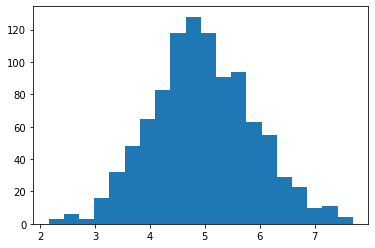

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

num_bins = 20
n, bins, patches = plt.hist(xN, num_bins)

# 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [287]:
k, n = 0, 1000000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
# Оценить вероятность выпадения 2-х орлов и 2-х решек при проведении 4-х испытаний
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

375619 1000000 0.375619


In [288]:
# Рассчитаем с помощью формулы биноминального распределения вероятность выпадения 2-х орлов и 2-х решек при проведении 4-х испытаний
# P = C (из n по k) * 1/2**n = (1/2**n) * (n! / (k! * (n-k)!))
k, n = 2, 4
p = (1 / 2**n) * (np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)))
print(p)

0.375


# 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [289]:
k, n = 0, 1000000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
g = np.random.randint(0, 2, n)
x = a + b + c + d + e + f + g
# Оценить вероятность выпадения 5-х орлов и 2-х решек при проведении 7-х испытаний
for i in range(0, n):
    if x[i] == 5:
        k = k + 1
print(k, n, k/n)

164660 1000000 0.16466


In [290]:
# Рассчитаем с помощью формулы биноминального распределения вероятность выпадения 5-х орлов и 2-х решек при проведении 4-х испытаний
# P = C (из n по k) * 1/2**n = (1/2**n) * (n! / (k! * (n-k)!))
k, n = 5, 7
p = (1 / 2**n) * (np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)))
print(p)

0.1640625


# 4 Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [291]:
import itertools

In [292]:
j = 0
for i in itertools.product('AB', repeat=3):
    j += 1
    print(''.join(i))
print(f'Вариантов сочетаний - {j}')

AAA
AAB
ABA
ABB
BAA
BAB
BBA
BBB
Вариантов сочетаний - 8


In [293]:
j = 0
for i in itertools.permutations('ABC', 3):
    j += 1
    print(''.join(str(x) for x in i))
print(f'Вариантов перестановок - {j}')

ABC
ACB
BAC
BCA
CAB
CBA
Вариантов перестановок - 6


In [294]:
j = 0
for i in itertools.combinations('ABCD', 3):
    j += 1
    print(''.join(i))
print(f'Вариантов сочетаний - {j}')

ABC
ABD
ACD
BCD
Вариантов сочетаний - 4


# 5 Дополните код расчетом коэффициента корреляции x и y по формуле
R = sum((xi - xm)(yi - ym))/sqr(sum((xi - xm)^2) * (sum((yi - ym)^2)))

Коэффициент корреляции с помощью функции в numpy:
0.9743069465202564
Коэффициент корреляции по общей формуле:
0.9743069465202558


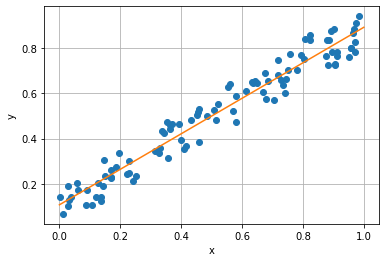

In [295]:
np.warnings.filterwarnings('ignore')
n = 100
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

c = np.corrcoef(x, y)
print('Коэффициент корреляции с помощью функции в numpy:')
print(c[0][1])
# найдем срдение значения x, y
xm = sum(x)/n
ym = sum(y)/n
c2 = (sum((x - xm) * (y - ym))) / (np.sqrt(sum((x - xm)**2) * sum((y - ym)**2)))
print('Коэффициент корреляции по общей формуле:')
print(c2)


a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
# print(a, b)
# print(a1, b1)

xm = sum(x)/n
ym = sum(y)/n

plt.plot([0, 1], [b, a + b])
plt.show()

# ЧЕРНОВИК

In [296]:
n = 10
x = np.random.rand(n)
y = np.random.rand(n)
print(np.corrcoef(x, y))

xm = sum(x)/n
# print(xm)
ym = sum(y)/n
# print(ym)
x1 = x-xm
y1 = y - ym
# print(x1)
# print(y1)
res = 0
for i in range(len(x1)):
    res += x1[i] * y1[i]
# print(res)
# print(sum(x1 * y1))
a = (sum((x - xm) * (y - ym)))
b = (np.sqrt(sum((x - xm)**2) * sum((y - ym)**2)))
c = a / b
c

[[1.         0.23569624]
 [0.23569624 1.        ]]


0.23569624046760634